In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as s
import initScripts as script
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
# 1. realna spotreba celeho
# vybrat data keby bola vonkajsia teplota medzi 15-20
# usetrenie celkovej spotreby, zo vsetkych dat
# usetrenie spotreby z medzi 15-20

# Statistika celeho datasetu

In [3]:
df = script.loadDataset('H')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6390 entries, 2019-04-09 00:00:00 to 2019-12-31 23:00:00
Data columns (total 5 columns):
T-outside    6390 non-null float64
H-outside    6390 non-null float64
KWH          6390 non-null float64
T-inside     6390 non-null float64
H-inside     6390 non-null float64
dtypes: float64(5)
memory usage: 619.5 KB


In [5]:
df.describe()

,T-outside,H-outside,KWH,T-inside,H-inside
count,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000
mean,15.029472,65.401676,4.926503,24.479980,29.059158
std,7.456175,9.756518,1.832093,2.617075,6.336083
min,-3.937500,40.000000,0.000000,20.922222,9.750621
25%,9.580208,60.000000,3.615750,22.011111,25.640066
50%,15.000000,68.000000,5.431000,24.187991,30.000000
75%,20.666667,73.000000,6.457000,26.033333,32.875000
max,33.933333,80.000000,7.639000,33.162500,46.000000


## Celkova spotrebna v datasete (od Aprila do Decembra)

In [6]:
df['KWH'].sum()

31480.353000000003

## Spotrebna v celom datasete ked vonkajsia teplota bola medzi 15 - 20 stupnov

In [7]:
df[(df['T-outside'] >= 15) & (df['T-outside'] <=20)]['KWH'].sum()

7880.218000000001

# Trenovanie modelu

In [8]:
df = script.loadDataset('H')
df['On'] = df['T-outside'].apply(lambda x : 1 if x <= 15 else 0)
df = df[df['KWH'] != 0]
df['SetT'] = 22
X = df[['T-outside','H-outside','T-inside','H-inside','On','SetT']]
y = df[['KWH']]

In [9]:
randomForest = RandomForestRegressor(random_state = 1, n_estimators= 1400, min_samples_split = 5,min_samples_leaf=1,max_features='sqrt',max_depth=None,bootstrap=True)
randomForest.fit(X,y)
X20RF = X[['T-outside','H-outside','T-inside','H-inside','On','SetT']]
X20RF['On'] = X20RF['T-outside'].apply(lambda x: 1 if x <= 20 else 0)
X20RF['KWH']= randomForest.predict(X20RF)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


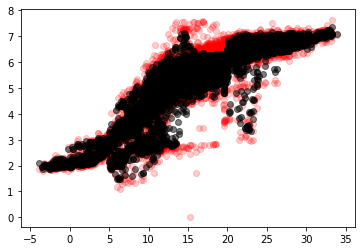

In [10]:
# cervena su povodne data
plt.scatter(X['T-outside'],y['KWH'],c='red',alpha=0.2)
# cierna su predikovane data
plt.scatter(X20RF['T-outside'],X20RF['KWH'],c='black',alpha=0.5)

# Spocitanie predikovanej spotreby


In [11]:
b_kwh = y['KWH'].sum()
predict_kwh = X20RF['KWH'].sum()
euro_b_kwh = b_kwh * 0.13
euro_predict_kwh = predict_kwh * 0.13

## Spotreba

In [12]:
print('Celorocna spotrebna KWH : '+str(b_kwh) )
print('Predikovana spotreba KWH : '+str(predict_kwh))
print('Rozdiel KWH :'+str(b_kwh-predict_kwh))

Celorocna spotrebna KWH : 31480.353
Predikovana spotreba KWH : 31101.672465792995
Rozdiel KWH :378.6805342070038


## Cena za spotrebu

In [13]:
print('Cena za spotrebu KWH : '+str(euro_b_kwh) )
print('Cena za predikovanu spotrebu KWH : '+str(euro_predict_kwh))
print('Rozdiel : '+str(euro_b_kwh-euro_predict_kwh))

Cena za spotrebu KWH : 4092.44589
Cena za predikovanu spotrebu KWH : 4043.2174205530896
Rozdiel : 49.22846944691037


# Spocitanie predikovanej spotreby medzi 15 a 20 stupnov

In [14]:
df = script.loadDataset('H')
b_kwh = df[(df['T-outside'] >= 15) & (df['T-outside'] <=20)]['KWH'].sum()
predict_kwh = X20RF[(X20RF['T-outside'] >= 15) & (X20RF['T-outside'] <=20)]['KWH'].sum()
euro_b_kwh = b_kwh * 0.13
euro_predict_kwh = predict_kwh * 0.13

## Spotreba

In [15]:
print('Celorocna spotrebna KWH : '+str(b_kwh) )
print('Predikovana spotreba KWH : '+str(predict_kwh))
print('Rozdiel KWH :'+str(b_kwh-predict_kwh))

Celorocna spotrebna KWH : 7880.218000000001
Predikovana spotreba KWH : 7504.276224851395
Rozdiel KWH :375.9417751486053


## Cena za spotrebu

In [16]:
print('Cena za spotrebu KWH : '+str(euro_b_kwh) )
print('Cena za predikovanu spotrebu KWH : '+str(euro_predict_kwh))
print('Rozdiel : '+str(euro_b_kwh-euro_predict_kwh))

Cena za spotrebu KWH : 1024.4283400000002
Cena za predikovanu spotrebu KWH : 975.5559092306814
Rozdiel : 48.872430769318726
